In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import set_matplotlib_formats

In [2]:
%matplotlib inline
mpl.rc('font', family = "Malgun Gothic") 
set_matplotlib_formats('retina')
mpl.rc('axes', unicode_minus = False)
pd.options.display.max_columns = 100

In [4]:
df1 = pd.read_excel('D:/data_경진대회/data_clean/data/DB분석_2017년+고객+주문+통합+리스트_서버1.xls')
df2 = pd.read_excel('D:/data_경진대회/data_clean/data/DB분석_2018년+고객+주문+통합+리스트_서버1.xls')
df3 = pd.read_excel('D:/data_경진대회/data_clean/data/DB분석_2019년+상반기+고객+주문+통합+리스트_서버1.xls')

In [5]:
column_list = ['개별배송비', '결제번호', '결제수단', '결제일시(입금확인일)','주문일시', '공급원가', '교환구분','매출경로',
 '발주일', '배송구분','배송대기일','배송시작일', '배송완료일','사용한 적립금액','상품구매금액',
'상품명(패커스(PACKUS))','주문상품명','수량','수령인 주소','예치금','입금은행','주문 상태','주문 시 회원등급','주문경로',
'주문경로(PC/모바일)','주문자ID','총 결제금액', '총 배송비', '총 상품구매금액', '총 주문금액', '최소주문수량',
'취소구분','카드 승인 취소 여부','카드사', '쿠폰 할인금액','특별관리회원', '판매가','회원등급', '회원등급 추가적립금액']

In [6]:
df1 = df1[column_list]
df2 = df2[column_list]
df3 = df3[column_list]

data1 = pd.concat([df1,df2,df3])
print(data1.shape)
data1.head(3)

(46749, 39)


,개별배송비,결제번호,결제수단,결제일시(입금확인일),주문일시,공급원가,교환구분,매출경로,발주일,배송구분,배송대기일,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명(패커스(PACKUS)),주문상품명,수량,수령인 주소,예치금,입금은행,주문 상태,주문 시 회원등급,주문경로,주문경로(PC/모바일),주문자ID,총 결제금액,총 배송비,총 상품구매금액,총 주문금액,최소주문수량,취소구분,카드 승인 취소 여부,카드사,쿠폰 할인금액,특별관리회원,판매가,회원등급,회원등급 추가적립금액
0,0,NaN,무통장입금,2017-01-02 16:38:58,2017-01-01 15:38:24,51700.0,교환안함,모바일웹,2017-01-02 16:38:58,배송완료,2017-01-17 08:25:36.860,2017-01-17 08:26:04,2017-01-17 08:26:26,0,66500,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)","105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",1,전라북도 전주시 덕진구 동부대로 879 (호성동1가),0,농협,배송 완료,일반,모바일웹,모바일,cgh1385,70500,4000,66500,70500,1.0,취소안함,취소안함,NaN,0,NaN,66500,일반,0
1,4000,NaN,"쿠폰,카드",2017-01-15 01:24:43,2017-01-15 01:24:43,6200.0,교환안함,PC쇼핑몰,2017-01-15 01:24:43,배송완료,2017-01-19 08:56:18.848,2017-01-19 08:56:55,2017-01-19 19:51:02,0,17000,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,1,전라북도 전주시 완산구 효자동3가 1676-13,0,NaN,배송 완료,일반,PC쇼핑몰,PC,pjkl77,16000,4000,17000,21000,1.0,취소안함,취소안함,NH (농협),5000,NaN,17000,사업자,0
2,0,NaN,"쿠폰,무통장입금",2017-01-18 18:38:50,2017-01-18 16:41:57,58300.0,교환안함,PC쇼핑몰,2017-01-18 18:38:50,배송완료,2017-01-19 19:54:17.175,2017-01-19 19:55:09,2017-01-20 16:14:06,0,73700,"105파이 다용도컵 세트 5호 특대 400ml 백색 PS 1,000개 1set(2박스)","105파이 다용도컵 세트 5호 특대 400ml 백색 PS 1,000개 1set(2박스)",1,경상북도 구미시 송동로7길 31-3 (도량동),0,농협,배송 완료,사업자,PC쇼핑몰,PC,kim0750,72700,4000,73700,77700,1.0,취소안함,취소안함,NaN,5000,NaN,73700,사업자,737


In [7]:
m1 = pd.read_csv('D:/data_경진대회/data_clean/data/member1.csv')
m2 = pd.read_csv('D:/data_경진대회/data_clean/data/member2.csv')

In [8]:
print(m1.shape)
m1.columns

(6575, 33)


Index(['가입시간', '나이', '누적주문건수', '별명', '사업자구분(P:개인사업자/C:법인사업자)', '사업자번호', '상호',
       '성별', '실결제금액', '아이디', '미가용 적립금', '사용가능 적립금', '주소(동/읍/면)', '지역',
       '총 방문횟수(1년 내)', '총 사용 적립금', '총 실주문건수', '총구매금액', '총예치금', '총적립금', '최종접속일',
       '최종주문일', '추가사항1', '추가사항2', '추천인 아이디', '탈퇴여부', '특별회원', '평생회원', '회원 가입경로',
       '회원 가입일', '회원구분', '회원등급', '회원등급코드'],
      dtype='object')

In [9]:
print(m2.shape)
m2.columns

(6785, 18)


Index(['회원번호', '등록일', '가입경로', '최종로그인일', '휴면해제일', '회원구분', '등급', '아이디', '주소',
       '주문건수', '주문금액', '마일리지', '예치금', '방문횟수', '업태', '종목', '추천인아이디', '성별'],
      dtype='object')

In [10]:
m2.isnull().sum()

회원번호         0
등록일          0
가입경로        51
최종로그인일       0
휴면해제일        0
회원구분         0
등급           0
아이디          0
주소         261
주문건수         0
주문금액         0
마일리지         0
예치금          0
방문횟수         0
업태        6629
종목        5893
추천인아이디    6539
성별        5889
dtype: int64

In [11]:
member_list1 = ['아이디','성별', '실결제금액','나이', '누적주문건수', '별명', '사업자구분(P:개인사업자/C:법인사업자)',
'주소(동/읍/면)', '지역','총 방문횟수(1년 내)', '총 사용 적립금', '총 실주문건수', '총구매금액', 
 '총예치금', '총적립금','탈퇴여부', '특별회원', '평생회원', '회원 가입경로','회원구분', '회원등급']

In [12]:
data2 = m1[member_list1]
print(data2.shape)
data2.head(3)

(6575, 21)


,아이디,성별,실결제금액,나이,누적주문건수,별명,사업자구분(P:개인사업자/C:법인사업자),주소(동/읍/면),지역,총 방문횟수(1년 내),총 사용 적립금,총 실주문건수,총구매금액,총예치금,총적립금,탈퇴여부,특별회원,평생회원,회원 가입경로,회원구분,회원등급
0,sr7577,남,-,45.0,0,NaN,NaN,경기도 평택시 현신3길 76 (용이동),충남,-,-,-,-,-,-,F,F,F,PC,개인,일반
1,cgh1385,남,70500,53.0,1,NaN,NaN,전라북도 전주시 덕진구 동부대로 879 (호성동1가),전북,-,-,1,70500,-,-,F,F,F,모바일,개인,일반
2,pjkl77,남,55000,28.0,3,NaN,법인사업자,전라북도 전주시 완산구 효자동3가 1676-13,전북,-,-,3,63000,-,-,F,F,F,PC,사업자,사업자


### 전처리

In [13]:
data1.columns

Index(['개별배송비', '결제번호', '결제수단', '결제일시(입금확인일)', '주문일시', '공급원가', '교환구분', '매출경로',
       '발주일', '배송구분', '배송대기일', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명(패커스(PACKUS))', '주문상품명', '수량', '수령인 주소', '예치금', '입금은행', '주문 상태',
       '주문 시 회원등급', '주문경로', '주문경로(PC/모바일)', '주문자ID', '총 결제금액', '총 배송비',
       '총 상품구매금액', '총 주문금액', '최소주문수량', '취소구분', '카드 승인 취소 여부', '카드사', '쿠폰 할인금액',
       '특별관리회원', '판매가', '회원등급', '회원등급 추가적립금액'],
      dtype='object')

In [14]:
data1['datetime'] = pd.to_datetime(data1['주문일시'])
data1[['datetime','주문일시']].head()

,datetime,주문일시
0,2017-01-01 15:38:24,2017-01-01 15:38:24
1,2017-01-15 01:24:43,2017-01-15 01:24:43
2,2017-01-18 16:41:57,2017-01-18 16:41:57
3,2017-01-23 00:35:04,2017-01-23 00:35:04
4,2017-02-02 13:39:52,2017-02-02 13:39:52


In [15]:
data1['year'] = data1['datetime'].dt.year
data1['month'] = data1['datetime'].dt.month
data1['work_week'] = data1['datetime'].dt.week
data1['day'] = data1['datetime'].dt.day
data1['day_of_week'] = data1['datetime'].dt.weekday_name
data1['hour'] = data1['datetime'].dt.hour
data1[['datetime','year','month','work_week','day','day_of_week','hour']].head()

,datetime,year,month,work_week,day,day_of_week,hour
0,2017-01-01 15:38:24,2017,1,52,1,Sunday,15
1,2017-01-15 01:24:43,2017,1,2,15,Sunday,1
2,2017-01-18 16:41:57,2017,1,3,18,Wednesday,16
3,2017-01-23 00:35:04,2017,1,4,23,Monday,0
4,2017-02-02 13:39:52,2017,2,5,2,Thursday,13


In [16]:
def div_time(data):
    result = str(data)
    return result[:10]

data1['date'] = data1['datetime'].apply(div_time)
data1['date'] = pd.to_datetime(data1['date'])

### 결제수단

In [17]:
data1['결제수단'].value_counts()

무통장입금                 24171
카드                    13703
적립금,무통장입금              3374
쿠폰,카드                  1306
적립금,카드                 1276
쿠폰,무통장입금               1204
휴대폰                     430
실시간계좌이체                 322
예치금,무통장입금               175
가상계좌                    130
카드,무통장입금                100
카카오페이(카드)                77
쿠폰,휴대폰                   67
페이나우(카드)                 50
예치금,적립금,무통장입금            47
적립금,휴대폰                  37
적립금,가상계좌                 30
예치금,카드                   28
예치금                      25
카카오페이(카카오머니)             22
페이나우(실시간 계좌이체)           21
에스크로(실시간계좌이체)            20
적립금                      16
쿠폰,카카오페이(카드)             16
쿠폰,카드,무통장입금              13
쿠폰,페이나우(카드)              11
적립금,페이나우(카드)              9
무통장입금,휴대폰                 9
예치금,적립금,카드                8
적립금,카카오페이(카드)             7
예치금,쿠폰,무통장입금              6
쿠폰,에스크로(실시간계좌이체)          6
적립금,실시간계좌이체               6
예치금,휴대폰                   5
쿠폰,가상계좌                   4
예치금,쿠폰,카드           

In [18]:
def div_cate(row):
    if '무통장' in row:
        return '무통장'
    elif '카드' in row:
        return '카드결제'
    elif '휴대폰' in row:
        return '휴대폰결제'
    elif '실시간' in row:
        return '실시간계좌이체'
    else:
        return '기타'

data1['결제수단(clean)'] = data1['결제수단'].apply(div_cate)
data1['결제수단(clean)'].value_counts()

무통장        29104
카드결제       16495
휴대폰결제        539
실시간계좌이체      379
기타           232
Name: 결제수단(clean), dtype: int64

### 카드사 데이터

In [19]:
data1['카드사'].value_counts()

삼성               3168
신한(구.LG카드 포함)    3024
현대               2219
비씨               1887
기타               1867
국민               1474
NH (농협)          1116
롯데                910
하나SK              350
외환                236
씨티                165
카카오뱅크              70
광주                 39
신한                 29
신협                 21
전북                 17
제주                 11
수협                  5
국내아멕스               3
Name: 카드사, dtype: int64

In [20]:
def div_card(row):
    if pd.isnull(row):
        return row 
    
    if '삼성' in row:
        return '삼성'
    elif '신한' in row:
        return '신한'
    elif '현대' in row:
        return '현대'
    elif '비씨' in row:
        return '비씨'
    elif '국민' in row:
        return '국민'
    elif '농협' in row:
        return '농협'
    elif '롯데' in row:
        return '롯데'
    elif '하나' in row:
        return '하나'
    else:
        return '기타'
    
data1['카드사(clean)'] = data1['카드사'].apply(div_card)
data1['카드사(clean)'].value_counts()

삼성    3168
신한    3053
기타    2434
현대    2219
비씨    1887
국민    1474
농협    1116
롯데     910
하나     350
Name: 카드사(clean), dtype: int64

### 고객 파악

In [21]:
def split_data(data):
    data=str(data)
    result =data.strip()
    return result
def replace_data(data):
    data=str(data)
    result = data.replace(',','')
    return result

data2['총결제금액'] = (data2['실결제금액']).apply(split_data)
data2['총결제금액'] = data2['총결제금액'].replace('-',0)
data2['총결제금액'] = data2['총결제금액'].apply(replace_data).astype(float)

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [22]:
data2['총방문횟수'] = data2['총 방문횟수(1년 내)'].apply(split_data)
data2['총방문횟수'] = data2['총방문횟수'].replace('-',0)
data2['총방문횟수'] = data2['총방문횟수'].apply(replace_data).astype(float)

C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [23]:
data2['탈퇴여부'].value_counts()

F    6575
Name: 탈퇴여부, dtype: int64

In [24]:
data2['특별회원'].value_counts()

F    6572
T       3
Name: 특별회원, dtype: int64

In [25]:
data2['평생회원'].value_counts()

T    3454
F    3121
Name: 평생회원, dtype: int64

In [26]:
data2['회원 가입경로'].value_counts()

PC     3696
모바일    2879
Name: 회원 가입경로, dtype: int64

In [27]:
data2['회원구분'].value_counts()

개인     4039
사업자    2534
외국인       2
Name: 회원구분, dtype: int64

In [28]:
data2['회원등급'].value_counts()

일반           2575
사업자          2160
전화주문 고객      1668
딜러 유치 회원      132
특별회원           15
딜러             10
일반(수신거부)        6
관리자             4
사업자(수신거부)       4
VIP             1
Name: 회원등급, dtype: int64

### 판매 데이터 시각화

In [29]:
data1.head(2)

,개별배송비,결제번호,결제수단,결제일시(입금확인일),주문일시,공급원가,교환구분,매출경로,발주일,배송구분,배송대기일,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명(패커스(PACKUS)),주문상품명,수량,수령인 주소,예치금,입금은행,주문 상태,주문 시 회원등급,주문경로,주문경로(PC/모바일),주문자ID,총 결제금액,총 배송비,총 상품구매금액,총 주문금액,최소주문수량,취소구분,카드 승인 취소 여부,카드사,쿠폰 할인금액,특별관리회원,판매가,회원등급,회원등급 추가적립금액,datetime,year,month,work_week,day,day_of_week,hour,date,결제수단(clean),카드사(clean)
0,0,NaN,무통장입금,2017-01-02 16:38:58,2017-01-01 15:38:24,51700.0,교환안함,모바일웹,2017-01-02 16:38:58,배송완료,2017-01-17 08:25:36.860,2017-01-17 08:26:04,2017-01-17 08:26:26,0,66500,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)","105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)",1,전라북도 전주시 덕진구 동부대로 879 (호성동1가),0,농협,배송 완료,일반,모바일웹,모바일,cgh1385,70500,4000,66500,70500,1.0,취소안함,취소안함,NaN,0,NaN,66500,일반,0,2017-01-01 15:38:24,2017,1,52,1,Sunday,15,2017-01-01,무통장,NaN
1,4000,NaN,"쿠폰,카드",2017-01-15 01:24:43,2017-01-15 01:24:43,6200.0,교환안함,PC쇼핑몰,2017-01-15 01:24:43,배송완료,2017-01-19 08:56:18.848,2017-01-19 08:56:55,2017-01-19 19:51:02,0,17000,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,소량 105파이 다용도컵 세트 5호 대 370ml 투명 PS 100개,1,전라북도 전주시 완산구 효자동3가 1676-13,0,NaN,배송 완료,일반,PC쇼핑몰,PC,pjkl77,16000,4000,17000,21000,1.0,취소안함,취소안함,NH (농협),5000,NaN,17000,사업자,0,2017-01-15 01:24:43,2017,1,2,15,Sunday,1,2017-01-15,카드결제,농협


In [30]:
data1.columns

Index(['개별배송비', '결제번호', '결제수단', '결제일시(입금확인일)', '주문일시', '공급원가', '교환구분', '매출경로',
       '발주일', '배송구분', '배송대기일', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명(패커스(PACKUS))', '주문상품명', '수량', '수령인 주소', '예치금', '입금은행', '주문 상태',
       '주문 시 회원등급', '주문경로', '주문경로(PC/모바일)', '주문자ID', '총 결제금액', '총 배송비',
       '총 상품구매금액', '총 주문금액', '최소주문수량', '취소구분', '카드 승인 취소 여부', '카드사', '쿠폰 할인금액',
       '특별관리회원', '판매가', '회원등급', '회원등급 추가적립금액', 'datetime', 'year', 'month',
       'work_week', 'day', 'day_of_week', 'hour', 'date', '결제수단(clean)',
       '카드사(clean)'],
      dtype='object')

In [31]:
pivot1 = pd.pivot_table(data=data1, index='date',values='총 결제금액',aggfunc='sum').reset_index()
pivot1.head(5)

,date,총 결제금액
0,2017-01-01,70500
1,2017-01-15,16000
2,2017-01-18,72700
3,2017-01-23,18000
4,2017-02-02,71000


C:\Users\Yeh-Hee\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '일자 별 총 결제금액')

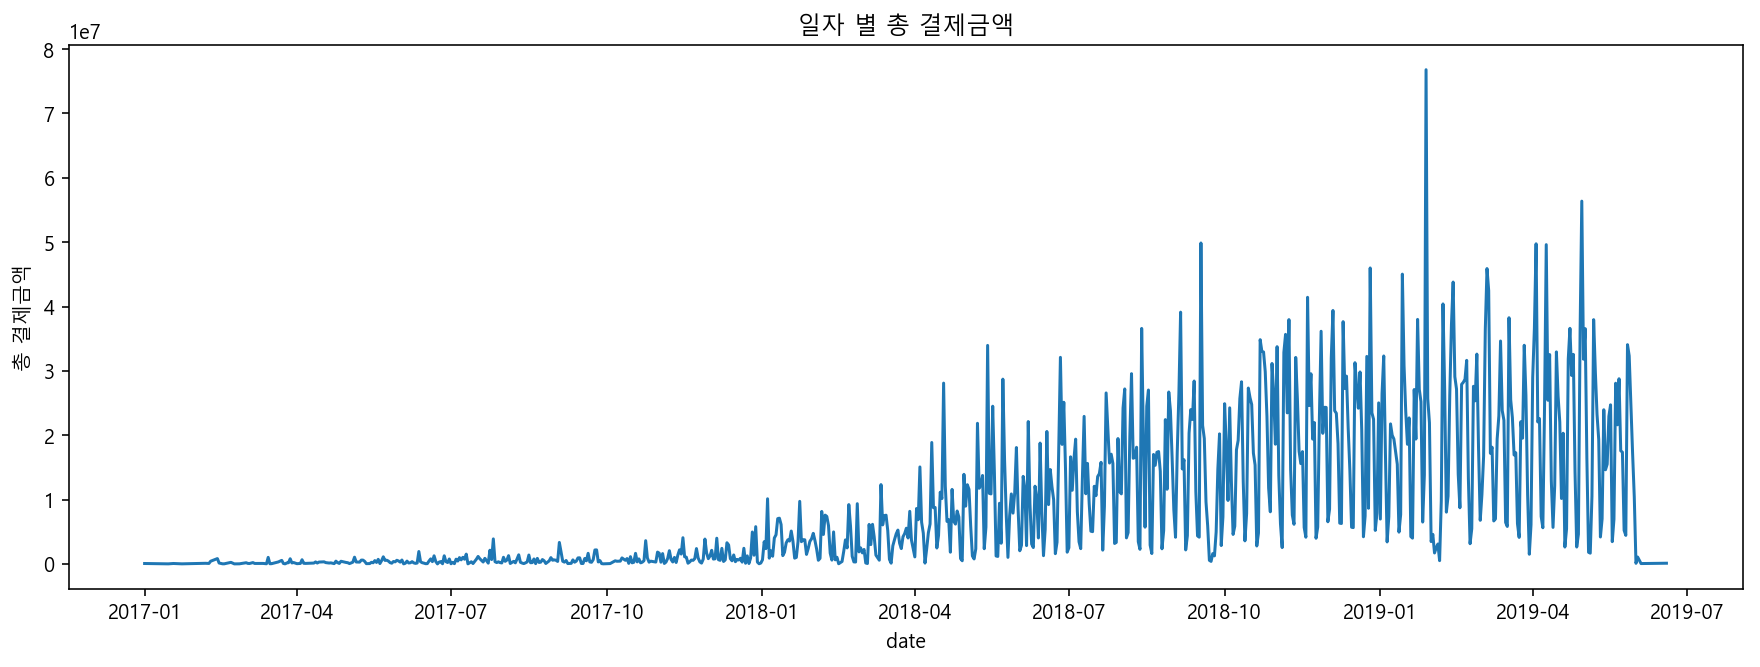

In [32]:
plt.figure(figsize=[15,5])
sns.lineplot(data=pivot1,x='date',y='총 결제금액')
plt.title('일자 별 총 결제금액')

In [33]:
### 패커스의 고객을 보면 대량구매하는 사업자와 소량구매하는 개개인이 다양하게 존재함을 알 수 있습니다. 주기적인 대량구매 고객도 존재하며 유통업체이 고객의 패커스의 총 결제금액은 19 년도로 갈수록 상승추이를 보이고 있다.

In [34]:
pivot2 = pd.pivot_table(data=data1, index=['year','month'],values='총 결제금액',aggfunc='sum').reset_index()
pivot2.head(5)

,year,month,총 결제금액
0,2017,1,177200
1,2017,2,2143575
2,2017,3,4389516
3,2017,4,4128200
4,2017,5,11341786


Text(0.5, 1.0, '월 별 총 결제금액')

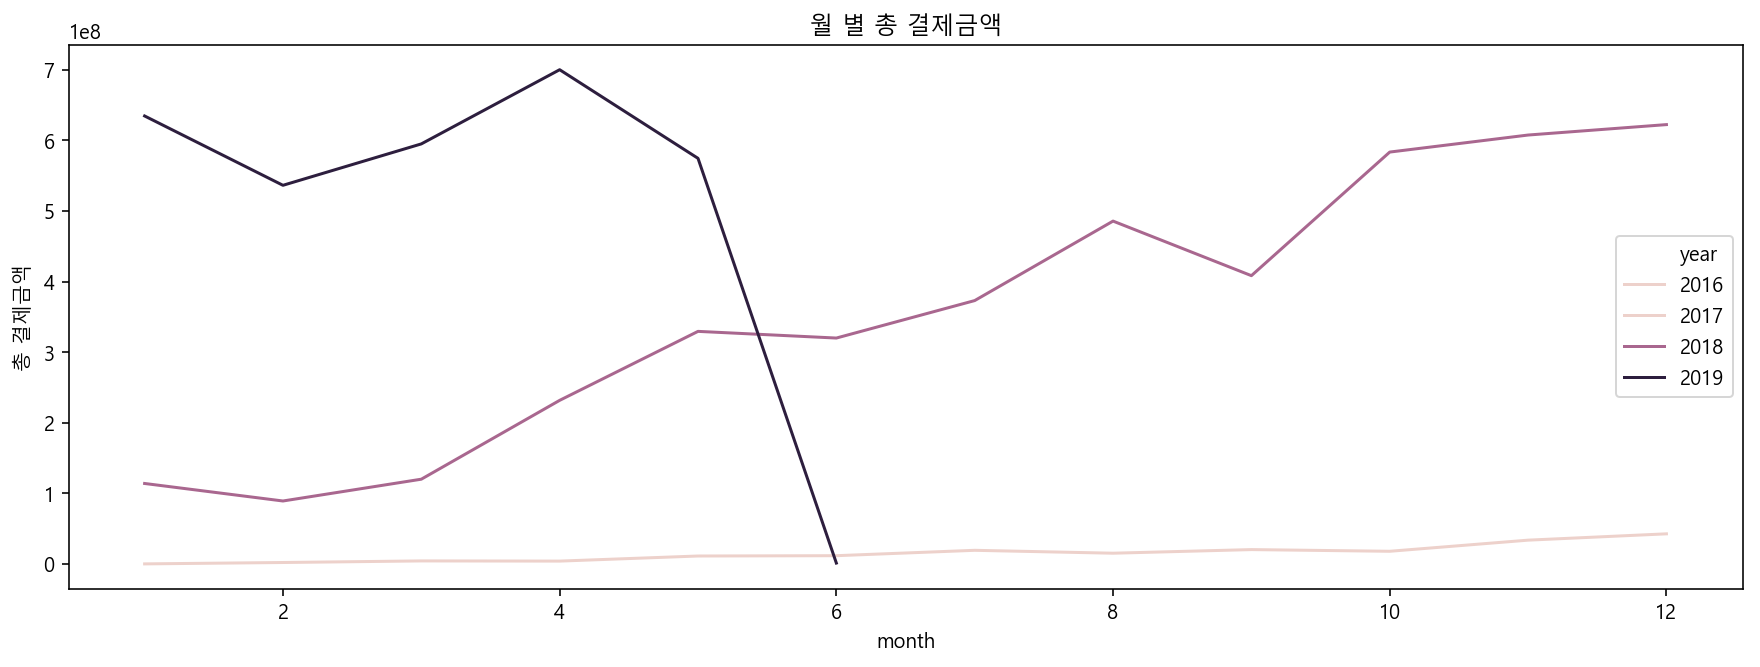

In [35]:
plt.figure(figsize=[15,5])
sns.lineplot(data=pivot2,x='month',y='총 결제금액',hue='year')
plt.title('월 별 총 결제금액')

### 18년도 6월 ~ 19년도 5월

In [36]:
condition1 = data1['date']>'2018-06-01'
condition2 = data1['date']<'2019-05-31'
data3= data1.loc[condition1&condition2]

In [37]:
print(data3.shape)
pivot2 = pd.pivot_table(data=data3, index='date',values='총 결제금액',aggfunc='sum').reset_index()
pivot2.head(5)

(39301, 49)


,date,총 결제금액
0,2018-06-02,2049240
1,2018-06-03,2903500
2,2018-06-04,13610130
3,2018-06-05,11556945
4,2018-06-06,2847410


Text(0.5, 1.0, '일자 별 총 결제금액')

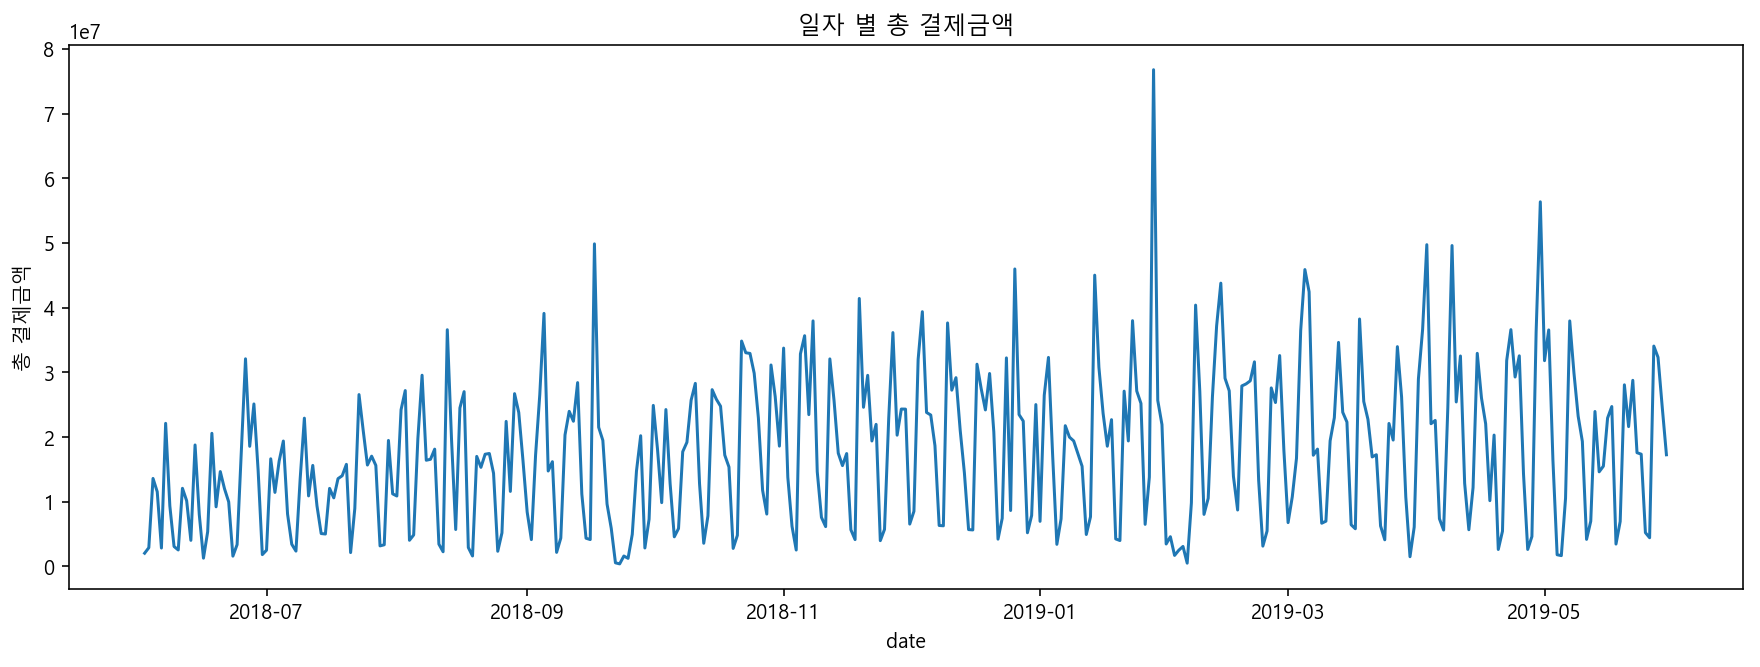

In [38]:
plt.figure(figsize=[15,5])
sns.lineplot(data=pivot2,x='date',y='총 결제금액')
plt.title('일자 별 총 결제금액')

In [39]:
pivot2.sort_values(by='총 결제금액',ascending=False).head(10)

,date,총 결제금액
240,2019-01-28,76804672
332,2019-04-30,56381768
107,2018-09-17,49879466
305,2019-04-03,49751880
311,2019-04-09,49619738
207,2018-12-26,45998102
276,2019-03-05,45903650
226,2019-01-14,45038830
256,2019-02-13,43806010
277,2019-03-06,42465310


### 요일별

In [40]:
pivot3 = pd.pivot_table(data=data3,index='day_of_week',values='총 결제금액',aggfunc='sum').reset_index()
pivot3

,day_of_week,총 결제금액
0,Friday,856400360
1,Monday,1383541180
2,Saturday,239809715
3,Sunday,299718266
4,Thursday,1164146123
5,Tuesday,1257187214
6,Wednesday,1221171772


Text(0.5, 1.0, '요일 별 총 결제금액')

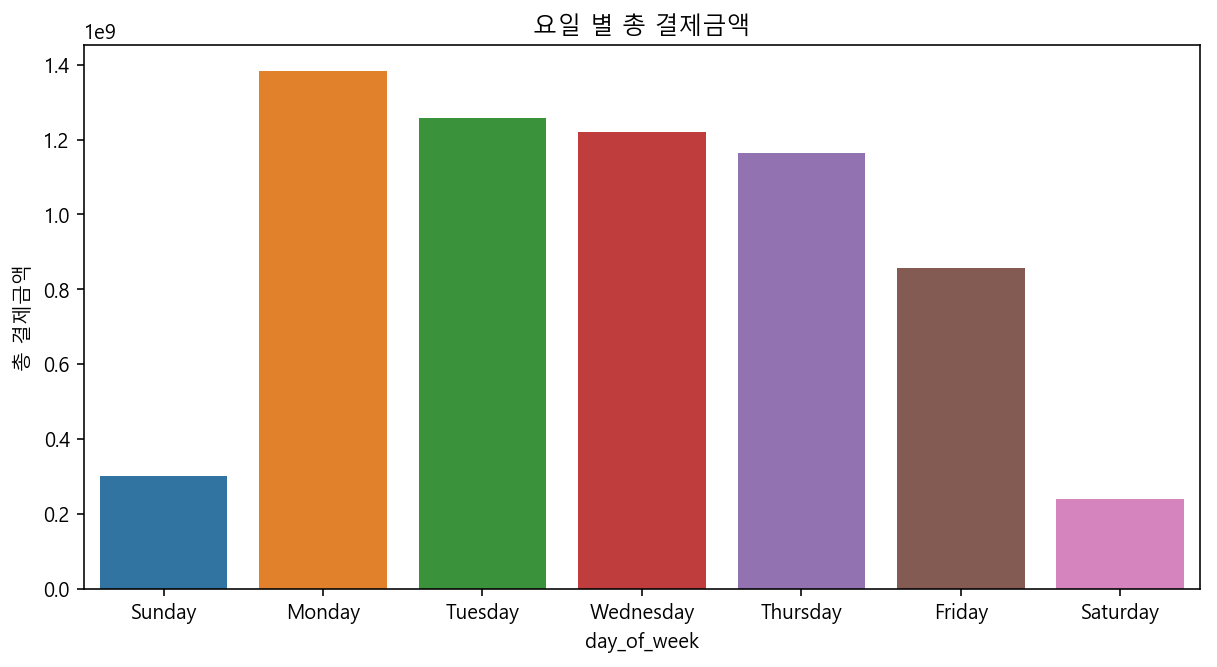

In [41]:
order_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] 
plt.figure(figsize=[10,5])
sns.barplot(data=pivot3,x='day_of_week',y='총 결제금액',order=order_list)
plt.title('요일 별 총 결제금액')

### 결제수단별

In [42]:
data1['결제수단(clean)'].value_counts()

무통장        29104
카드결제       16495
휴대폰결제        539
실시간계좌이체      379
기타           232
Name: 결제수단(clean), dtype: int64

In [43]:
pivot4 = pd.pivot_table(data=data1,index='결제수단(clean)',values='총 결제금액',aggfunc='sum').reset_index()
pivot4

,결제수단(clean),총 결제금액
0,기타,47985110
1,무통장,4804076721
2,실시간계좌이체,45333099
3,카드결제,2555507973
4,휴대폰결제,57793168


Text(0.5, 1.0, '결제 수단 별 총 결제금액')

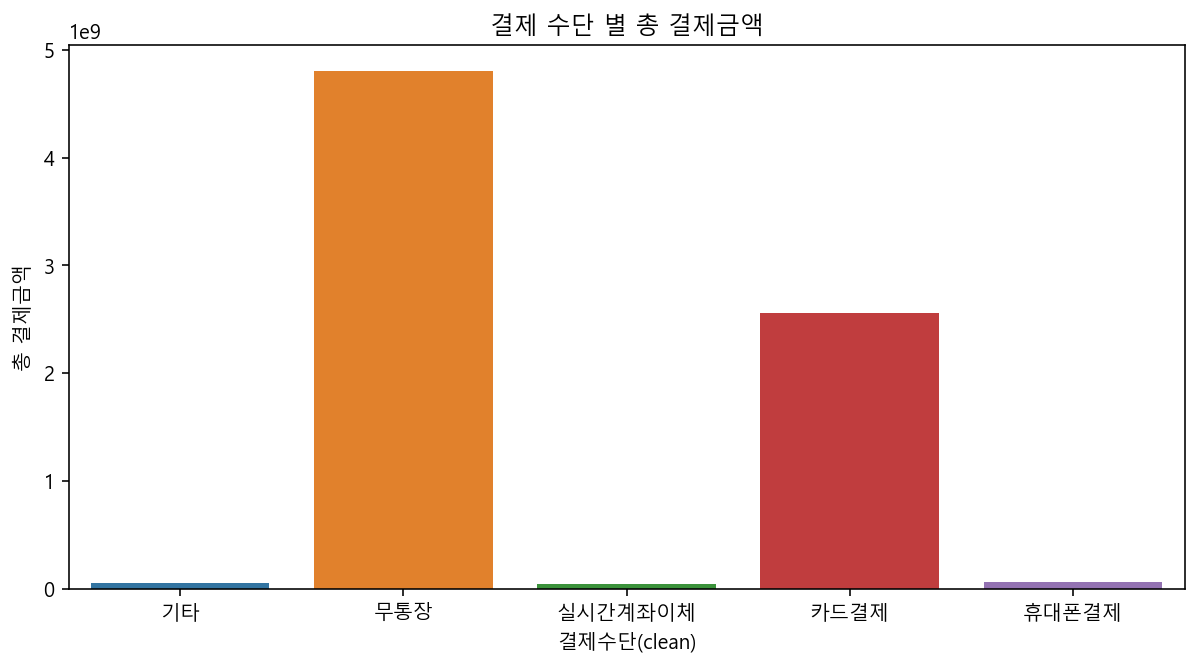

In [44]:
plt.figure(figsize=[10,5])
sns.barplot(data=pivot4,x='결제수단(clean)',y='총 결제금액')
plt.title('결제 수단 별 총 결제금액')

### 카드사별

In [45]:
data1['카드사(clean)'].value_counts()

삼성    3168
신한    3053
기타    2434
현대    2219
비씨    1887
국민    1474
농협    1116
롯데     910
하나     350
Name: 카드사(clean), dtype: int64

In [46]:
pivot5 = pd.pivot_table(data=data1,index='카드사(clean)',values='총 결제금액',aggfunc='sum').reset_index()
pivot5

,카드사(clean),총 결제금액
0,국민,216609940
1,기타,262596241
2,농협,163852906
3,롯데,151759166
4,비씨,275352038
5,삼성,614593754
6,신한,491689516
7,하나,45314220
8,현대,373014302


In [47]:
order_list1 = pivot5.sort_values(by='총 결제금액',ascending=False)['카드사(clean)'].tolist()

Text(0.5, 1.0, '카드사 별 총 결제금액')

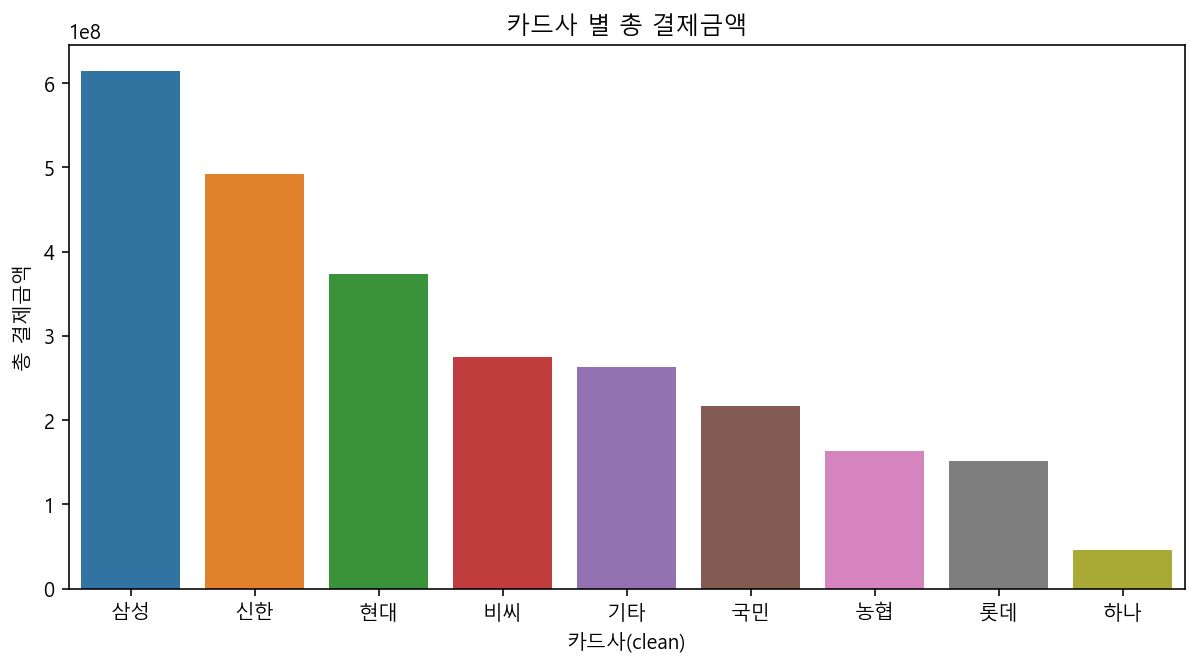

In [48]:
plt.figure(figsize=[10,5])
sns.barplot(data=pivot5,x='카드사(clean)',y='총 결제금액',order=order_list1)
plt.title('카드사 별 총 결제금액')

### 매출경로별

In [49]:
df1['매출경로'].value_counts()

PC쇼핑몰     980
모바일웹      334
네이버 페이    316
Name: 매출경로, dtype: int64

In [50]:
pivot5 = pd.pivot_table(data=data1,index='매출경로',values='총 결제금액',aggfunc='sum').reset_index()
pivot5

,매출경로,총 결제금액
0,PC쇼핑몰,5624370417
1,네이버 쇼핑,735030
2,네이버 페이,262969428
3,모바일웹,1622621196


Text(0.5, 1.0, '매출경로 별 총 결제금액')

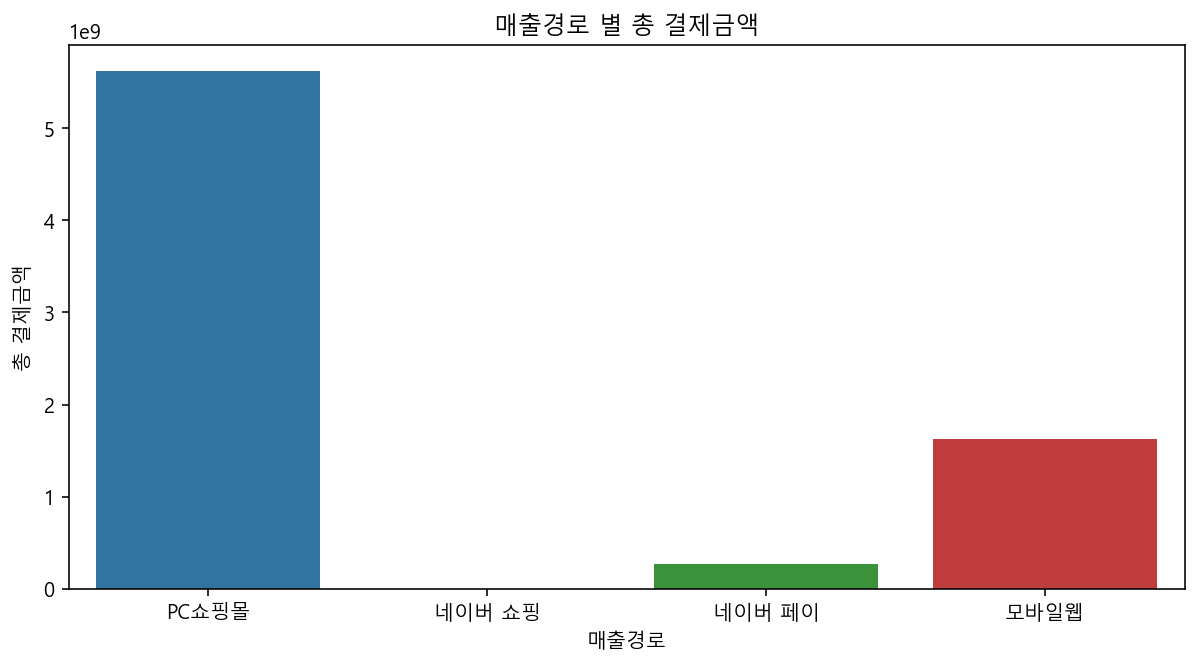

In [51]:
plt.figure(figsize=[10,5])
sns.barplot(data=pivot5,x='매출경로',y='총 결제금액')
plt.title('매출경로 별 총 결제금액')

### 고객 데이터 시각화

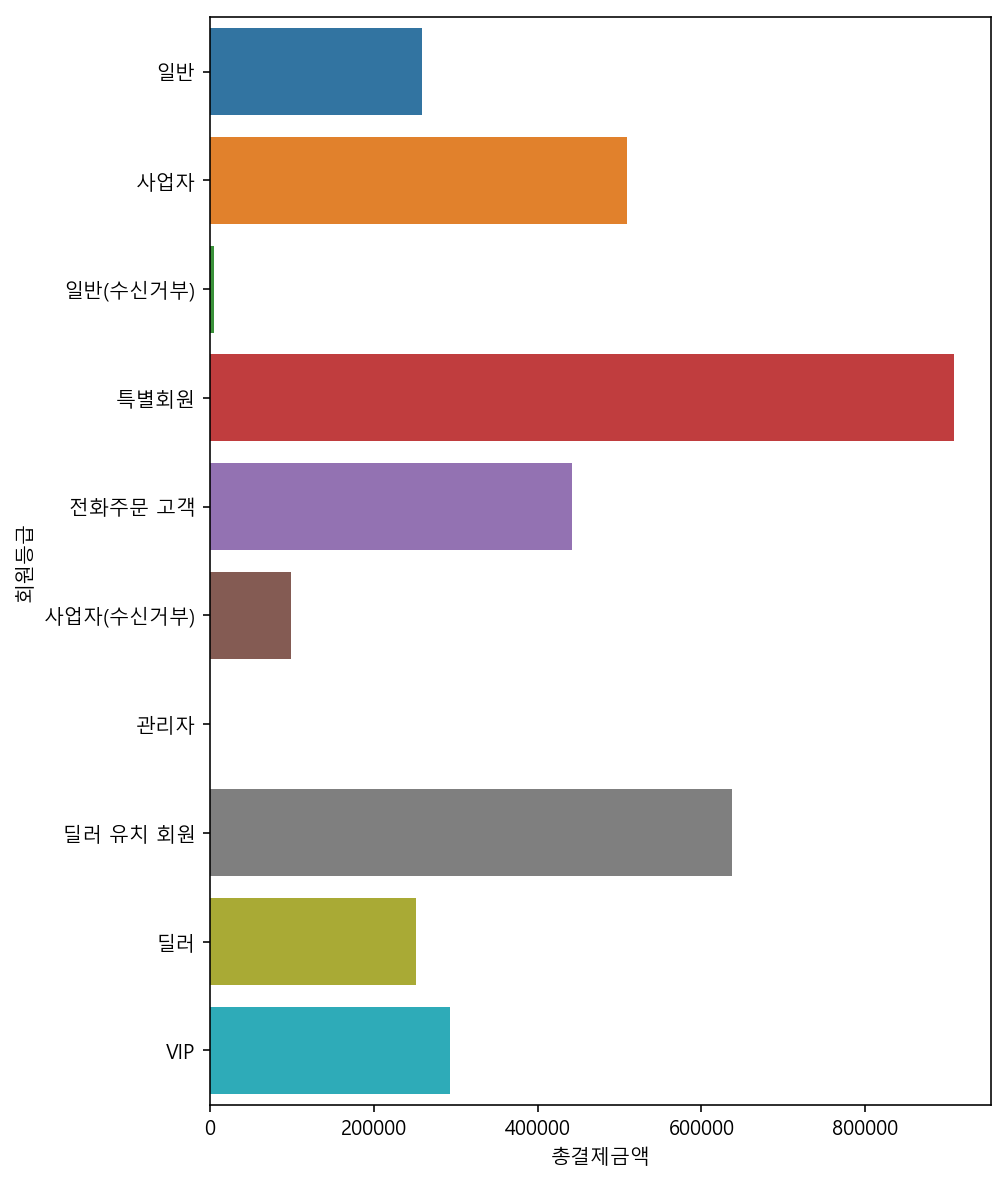

In [52]:
plt.figure(figsize=[7,10])
sns.barplot(data=data2, y='회원등급',x='총결제금액',ci=None)

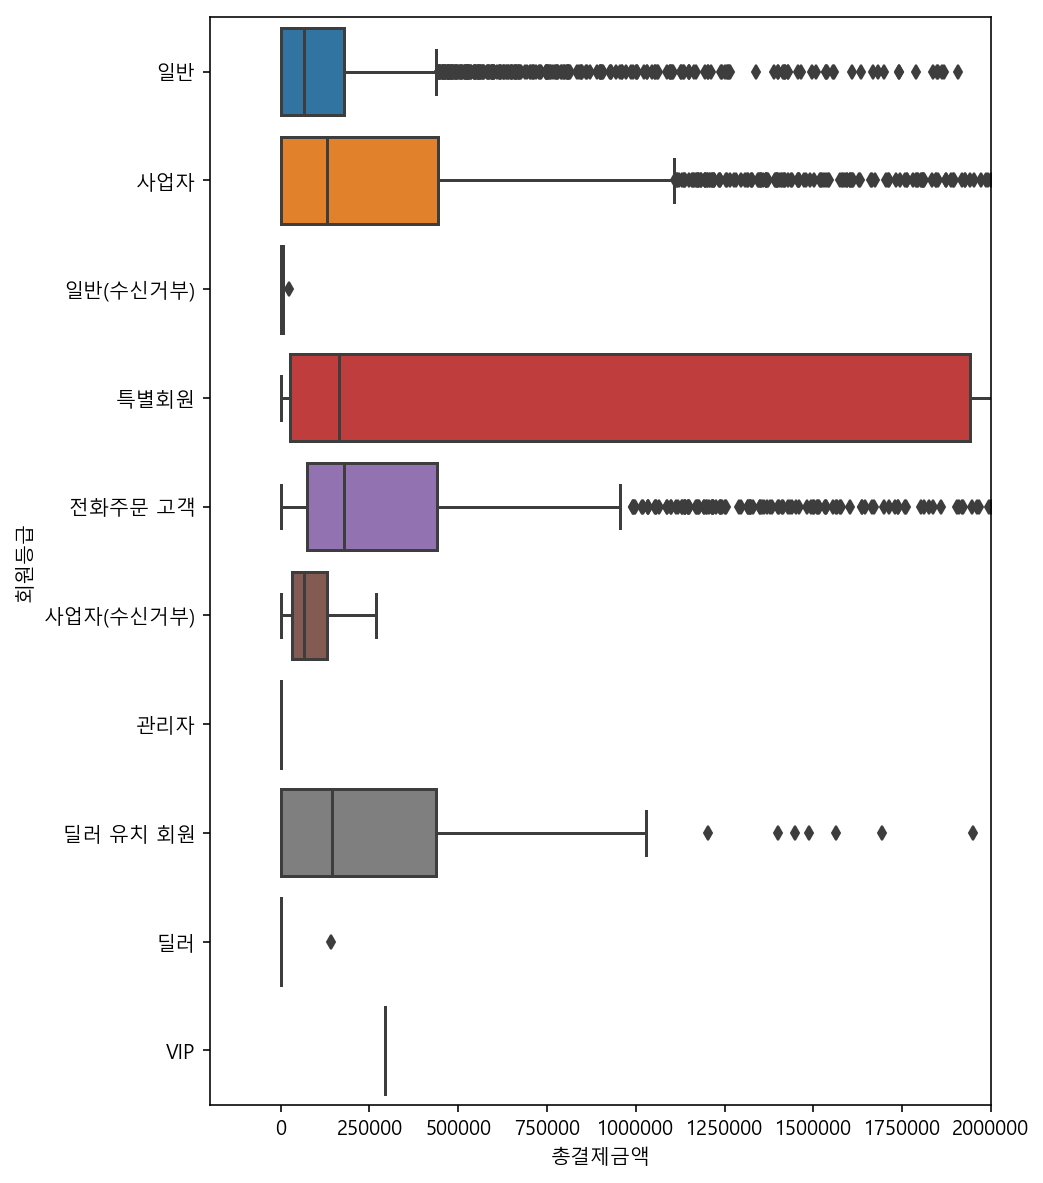

In [53]:
plt.figure(figsize=[7,10])
plt.xlim([-200000,2000000])
sns.boxplot(data=data2, y='회원등급',x='총결제금액')

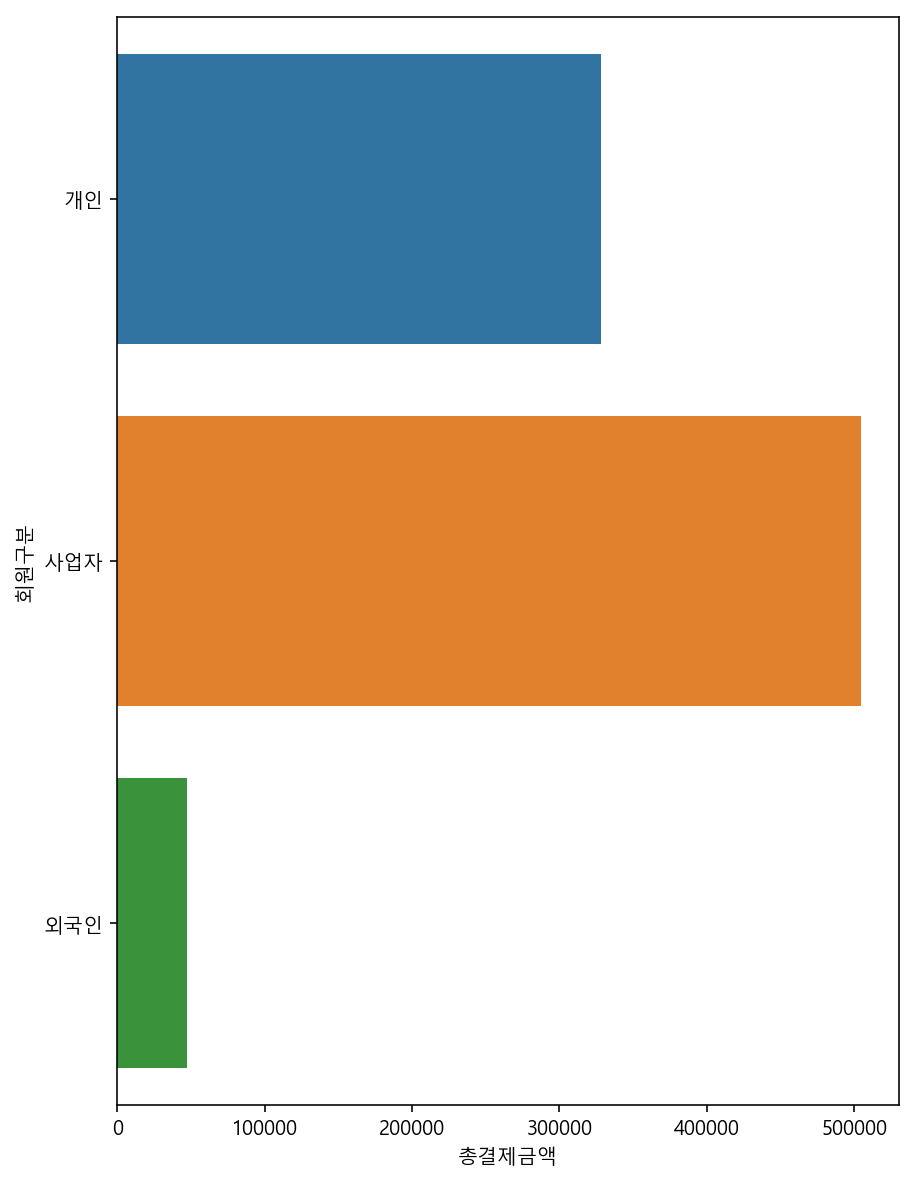

In [54]:
plt.figure(figsize=[7,10])
sns.barplot(data=data2, y='회원구분',x='총결제금액',ci=None)

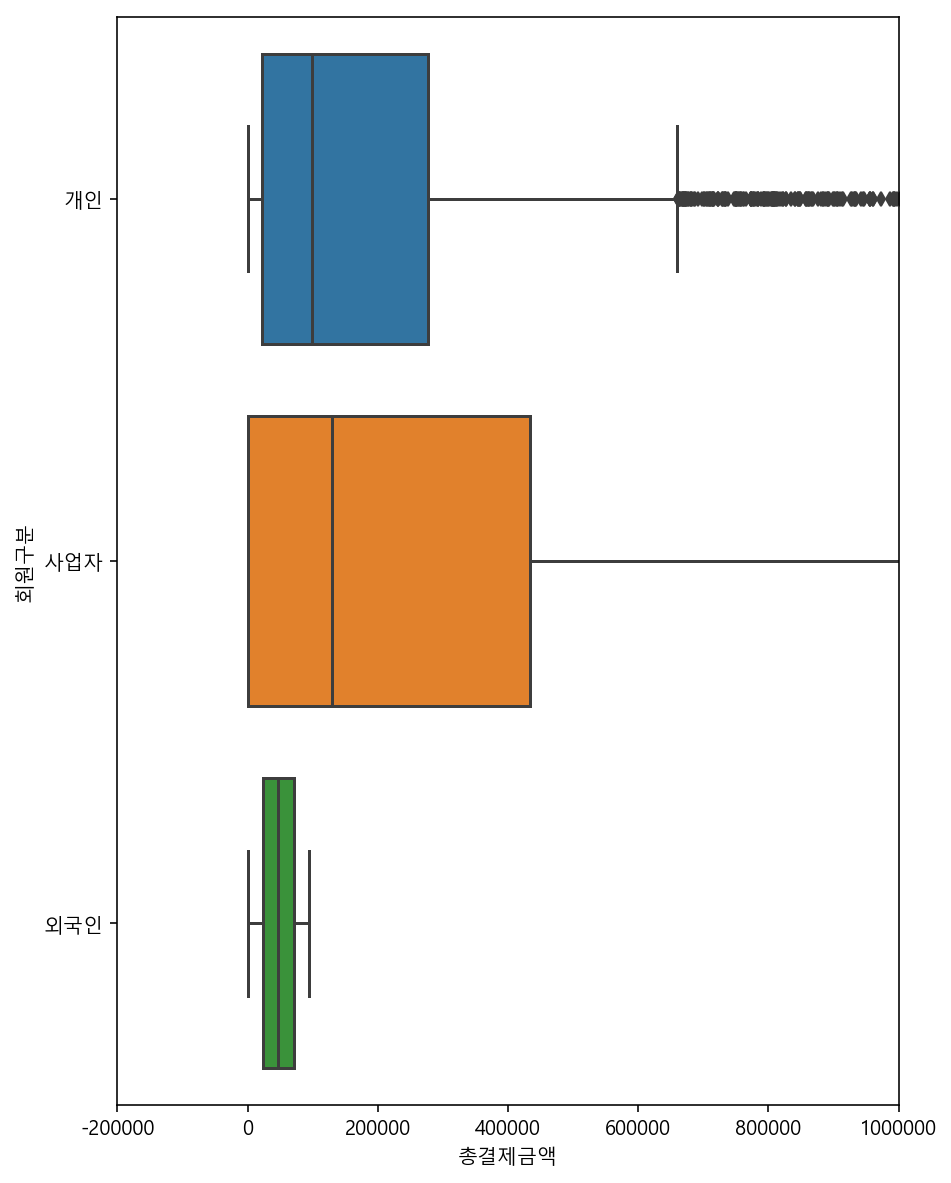

In [55]:
plt.figure(figsize=[7,10])
plt.xlim([-200000,1000000])
sns.boxplot(data=data2, y='회원구분',x='총결제금액')

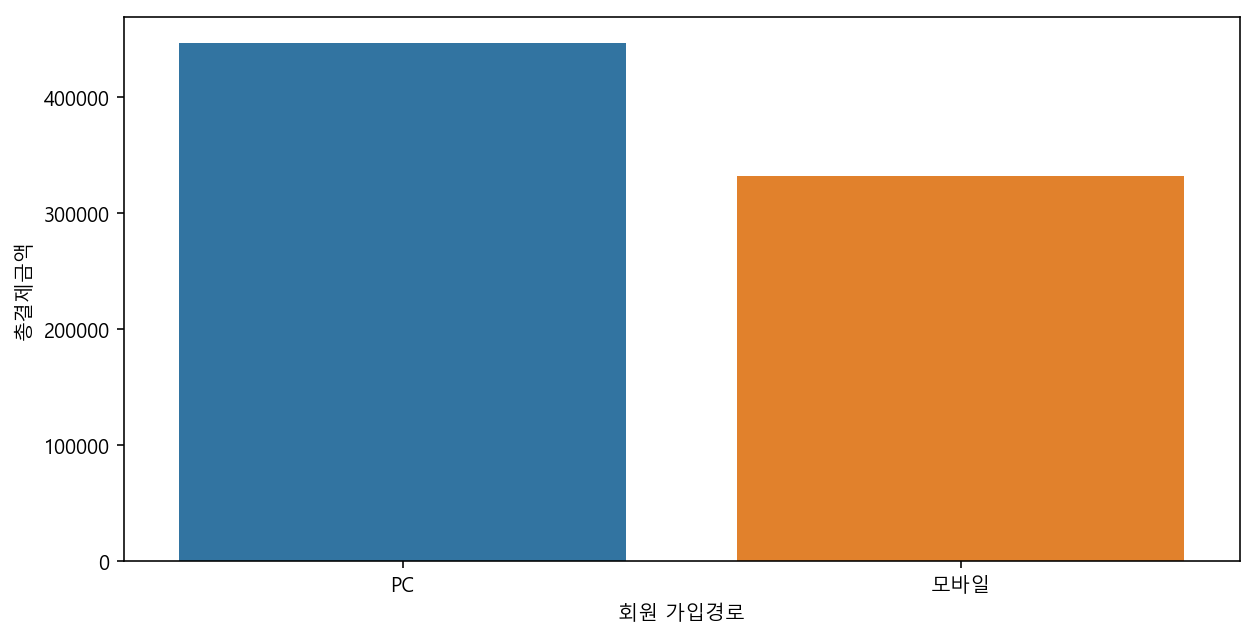

In [56]:
plt.figure(figsize=[10,5])
sns.barplot(data=data2, x='회원 가입경로',y='총결제금액',ci=None)

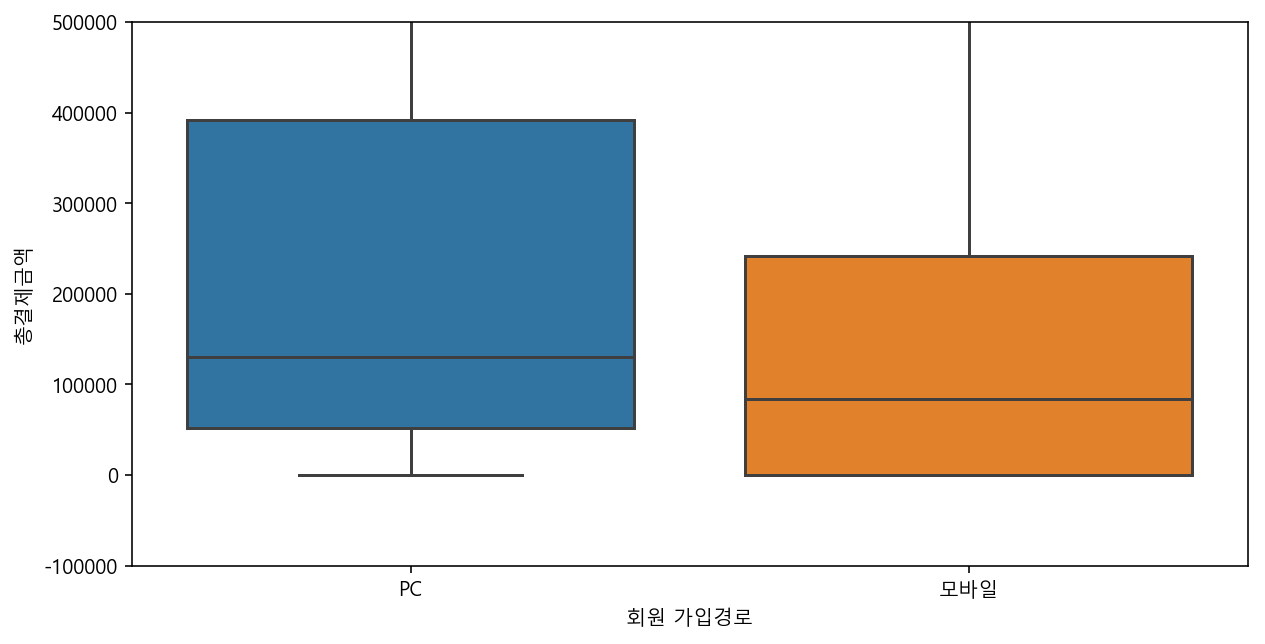

In [57]:
plt.figure(figsize=[10,5])
plt.ylim([-100000,500000])
sns.boxplot(data=data2, x='회원 가입경로',y='총결제금액')

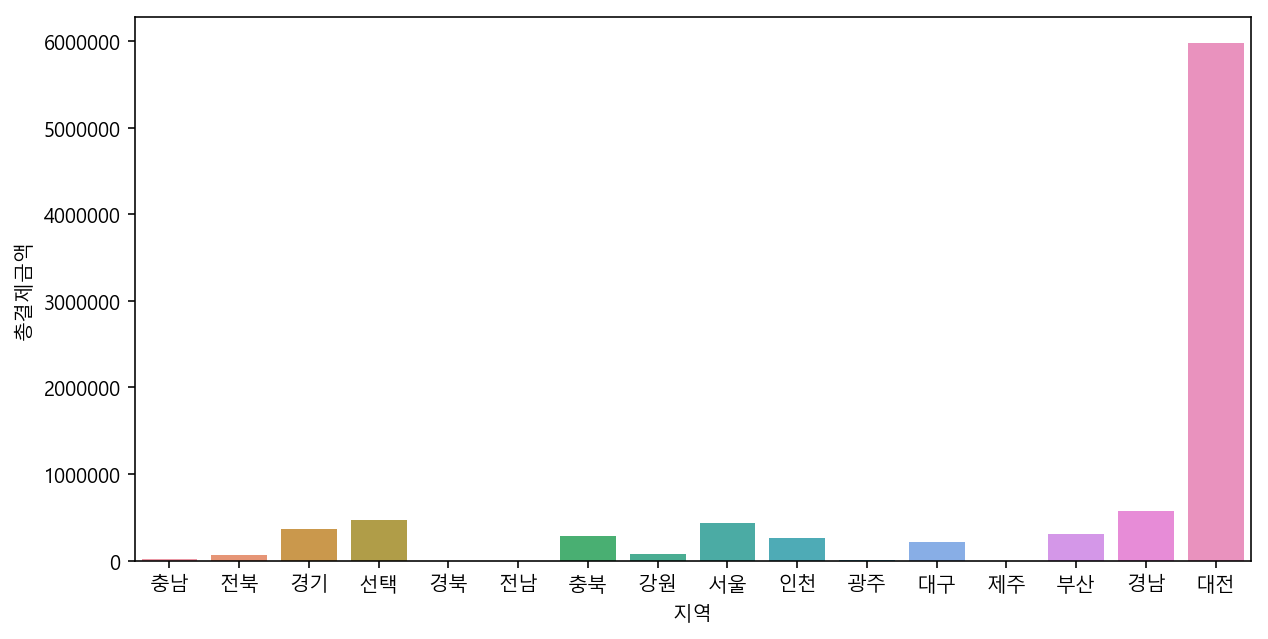

In [58]:
plt.figure(figsize=[10,5])
sns.barplot(data=data2, x='지역',y='총결제금액',ci=None)

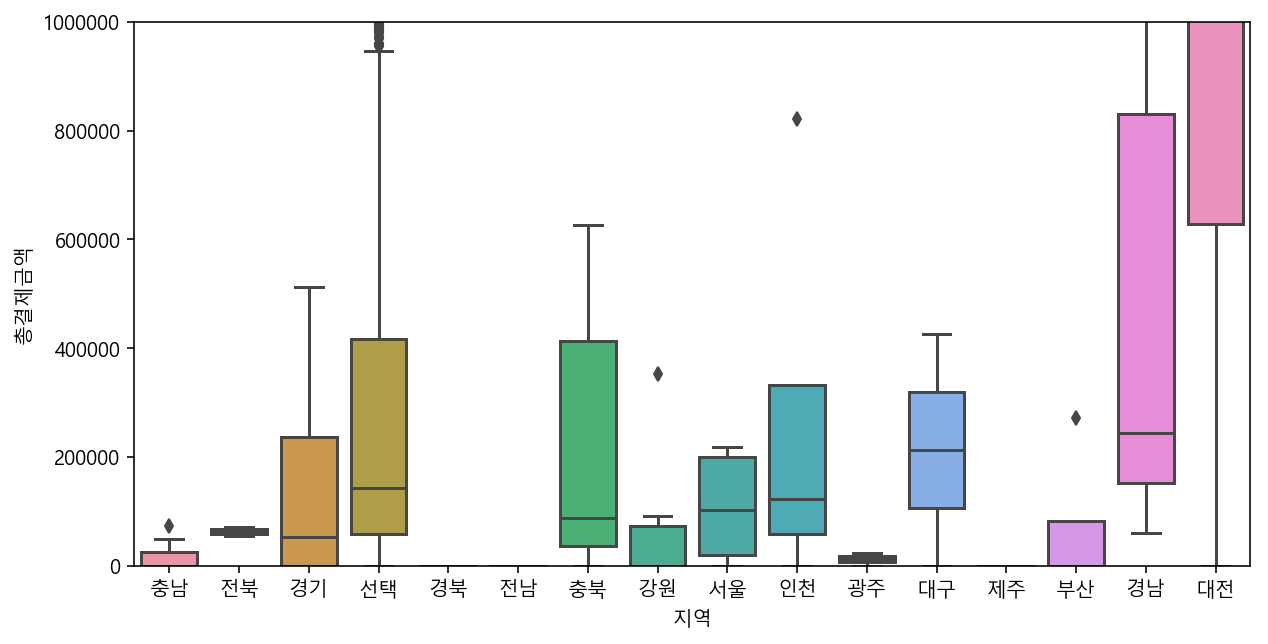

In [59]:
plt.figure(figsize=[10,5])
plt.ylim([-100,1000000])
sns.boxplot(data=data2, x='지역',y='총결제금액')

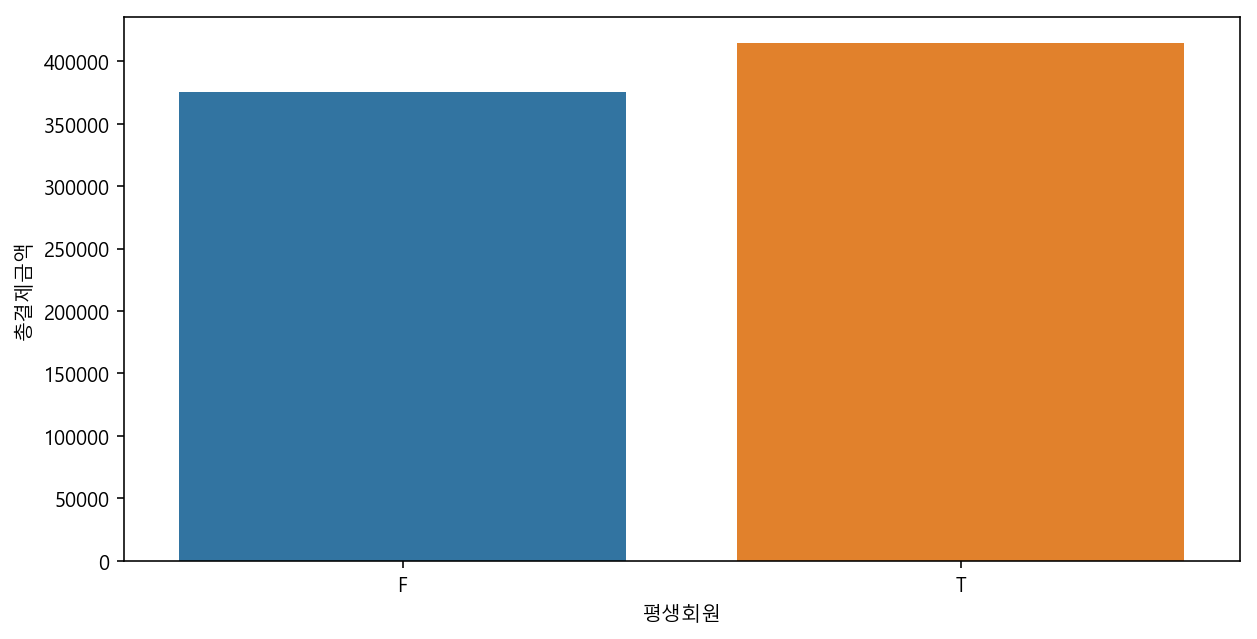

In [60]:
plt.figure(figsize=[10,5])
sns.barplot(data=data2, x='평생회원',y='총결제금액',ci=None)

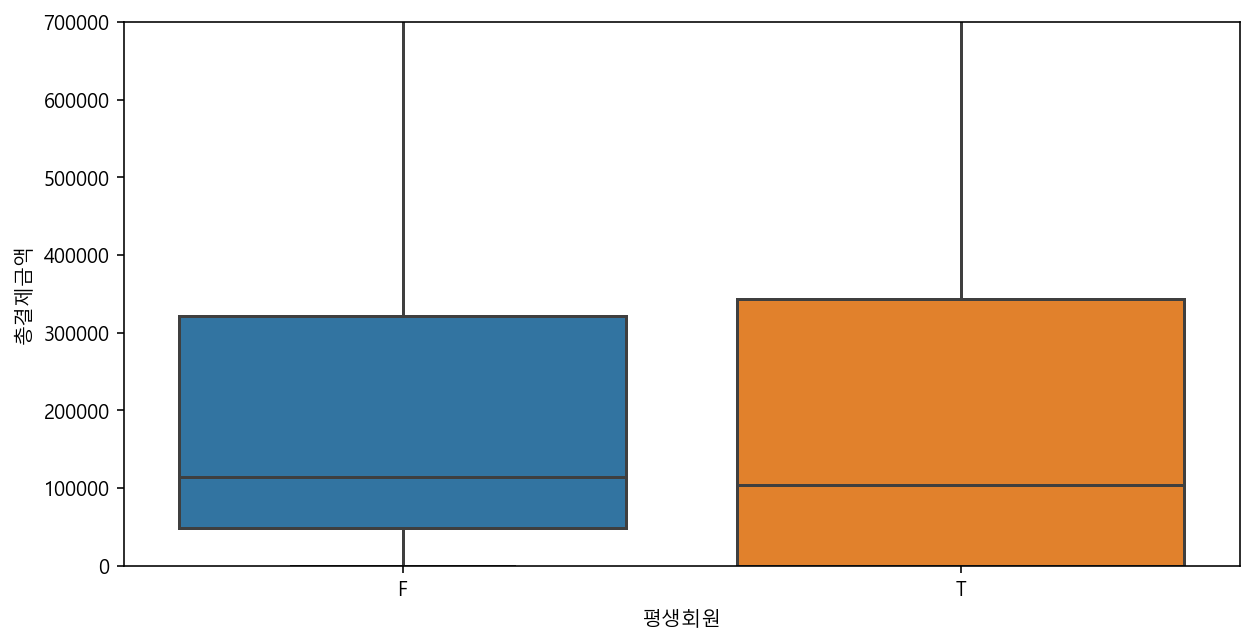

In [61]:
plt.figure(figsize=[10,5])
plt.ylim([0,700000])
sns.boxplot(data=data2, x='평생회원',y='총결제금액')

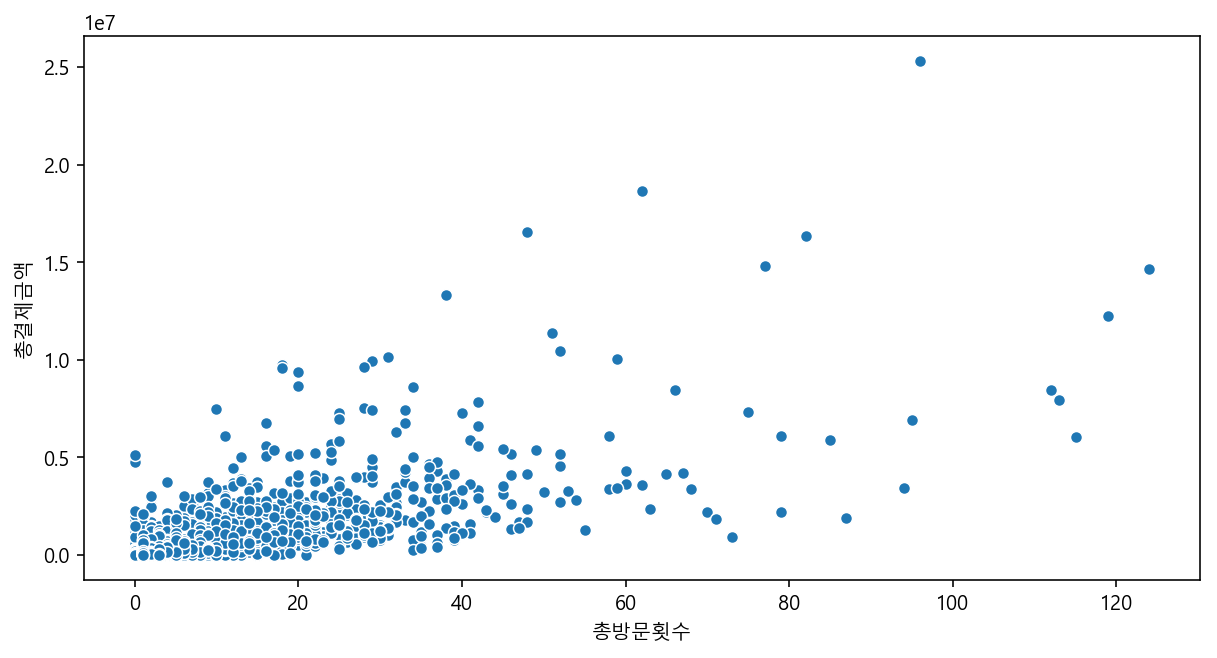

In [62]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=data2, x='총방문횟수',y='총결제금액')

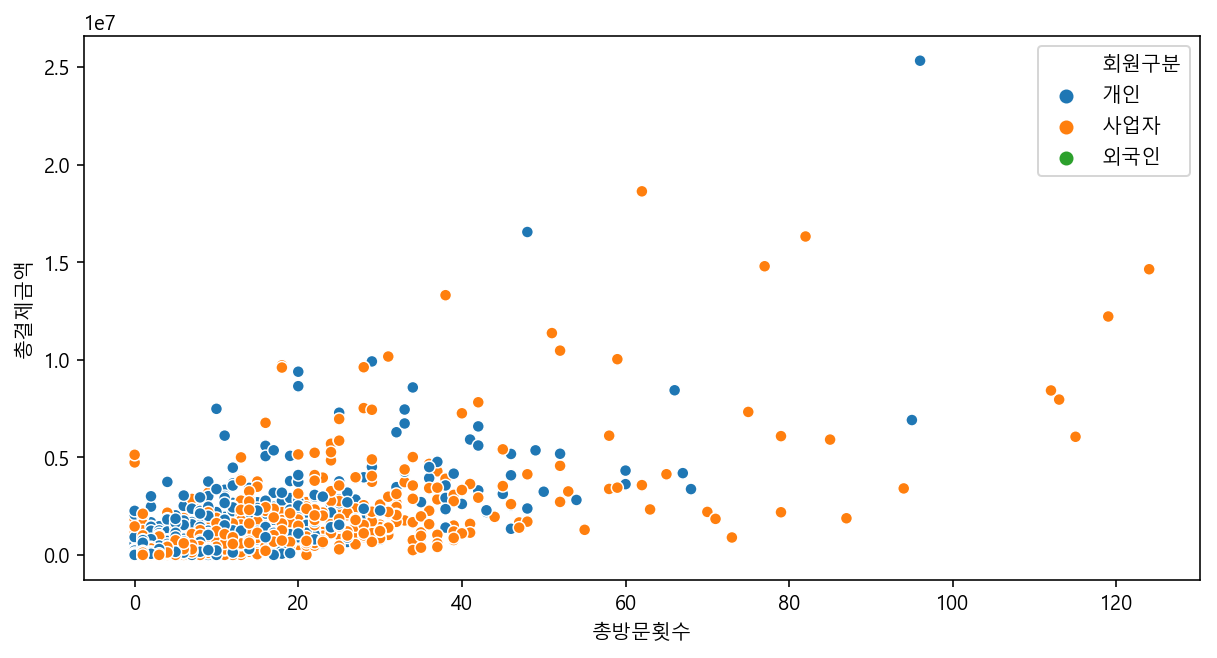

In [63]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=data2, x='총방문횟수',y='총결제금액',hue='회원구분')

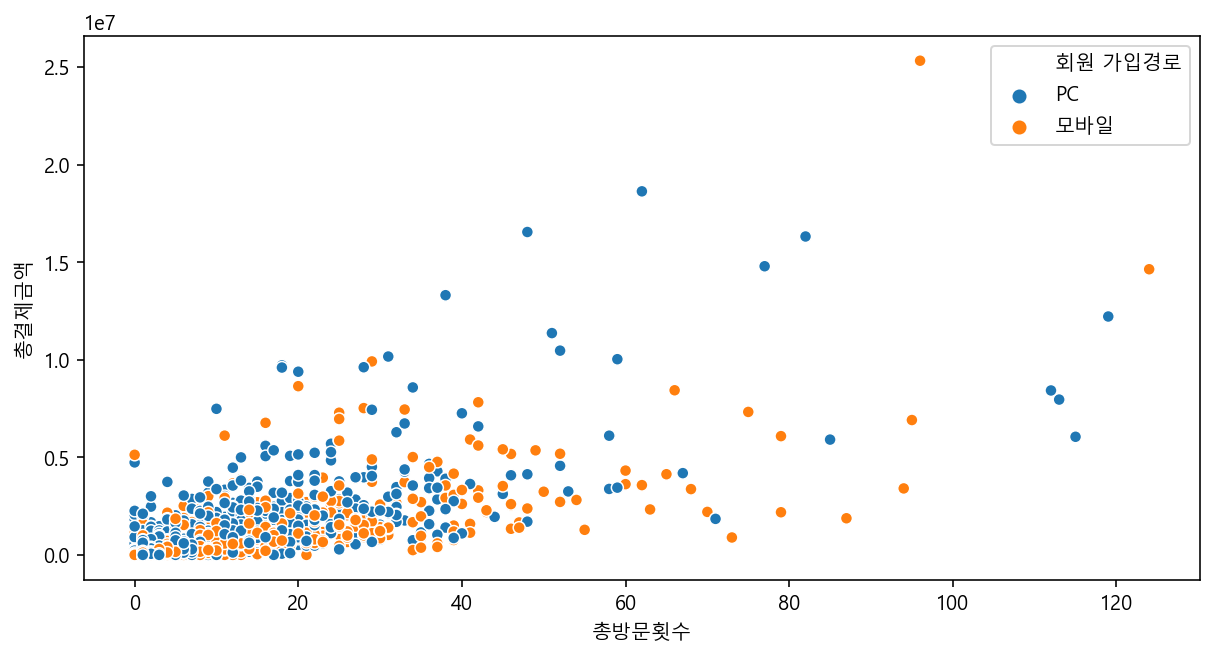

In [64]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=data2, x='총방문횟수',y='총결제금액',hue='회원 가입경로')

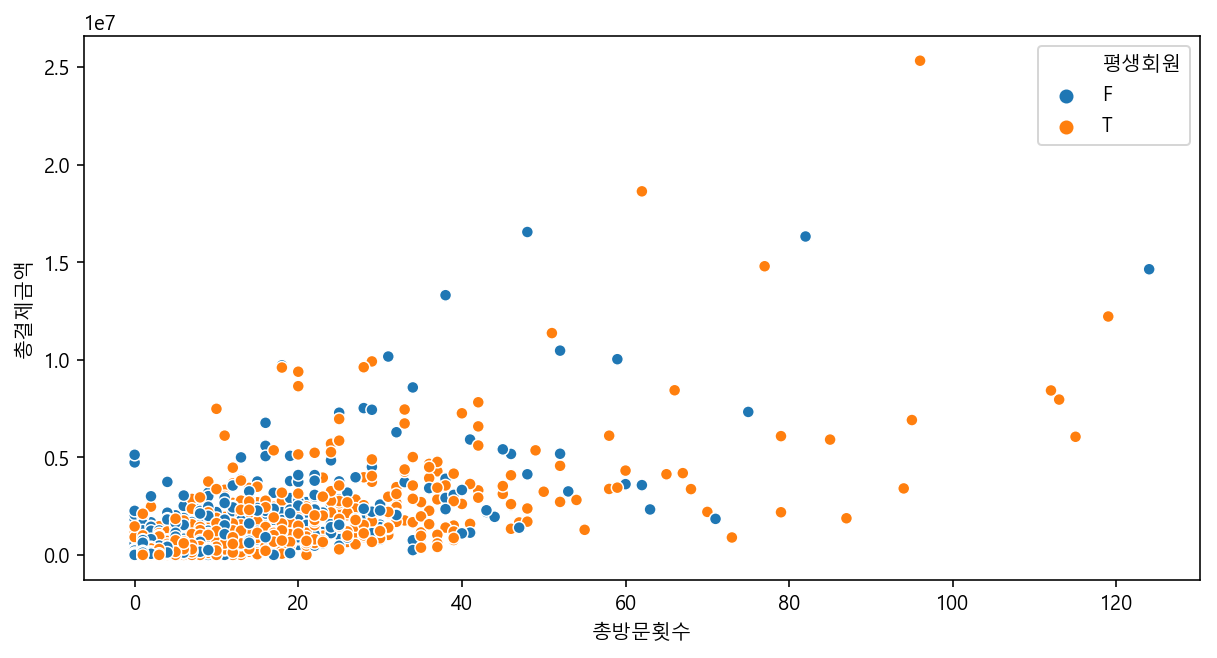

In [65]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=data2, x='총방문횟수',y='총결제금액',hue='평생회원')

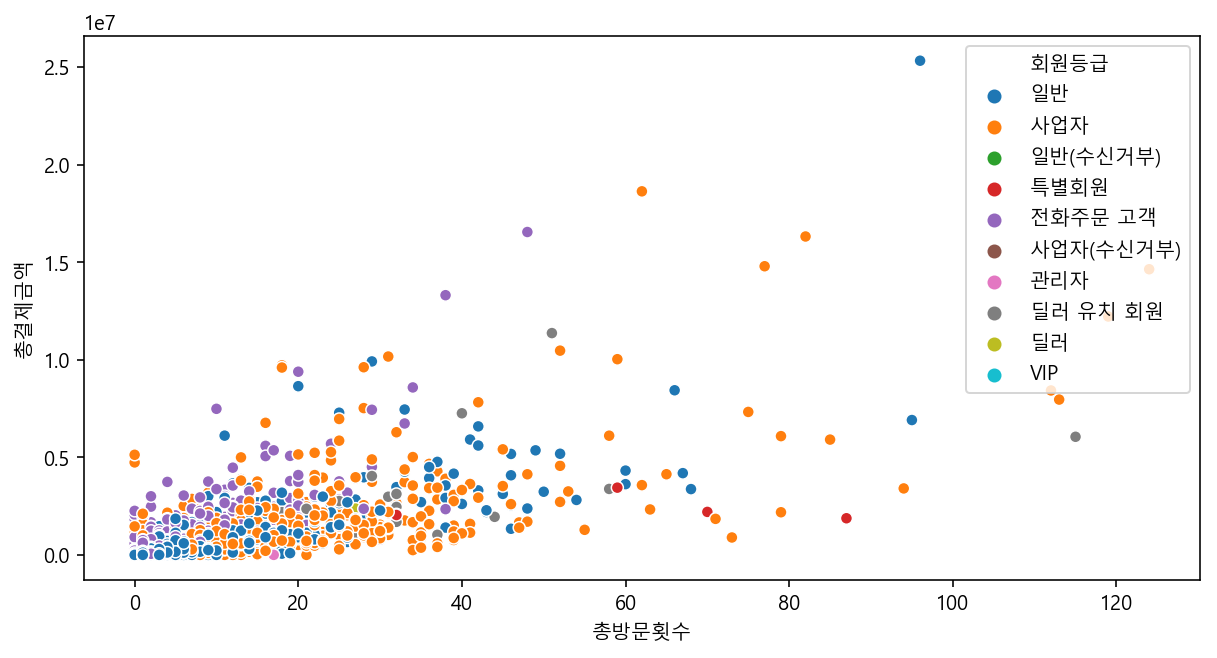

In [66]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=data2, x='총방문횟수',y='총결제금액',hue='회원등급')